<a href="https://colab.research.google.com/github/btnbrd/ml-course/blob/25s_ml_trainings_3/homeworks/hw01_classification/01_hw_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Классификация FashionMNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.81MB/s]


Text(0.5, 1.0, 'Image label: 1')

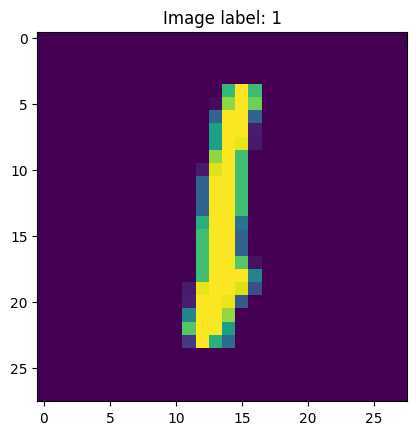

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [12]:
class CLS(nn.Module):
    def __init__(self):
        super(CLS, self).__init__()
        # Входной размер: 28x28 = 784 (MNIST изображения разворачиваем в вектор)
        self.flatten = nn.Flatten()  # Разворачиваем изображение в вектор
        # Полносвязные слои
        self.fc1 = nn.Linear(784, 256)  # Первый слой: 784 -> 256
        self.relu1 = nn.ReLU()          # Функция активации
        self.fc2 = nn.Linear(256, 128)  # Второй слой: 256 -> 128
        self.relu2 = nn.ReLU()          # Функция активации
        self.fc3 = nn.Linear(128, 10)   # Выходной слой: 128 -> 10 (10 классов)

    def forward(self, x):
        x = self.flatten(x)  # Разворачиваем изображение
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)  # Логиты (без softmax, так как CrossEntropyLoss сам применяет его)
        return x

In [13]:
# Creating model instance
model = CLS() # your code here

Ниже доступны локальные тесты для проверки вашей модели:

In [14]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    print(random_batch[0].shape)
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]
    print(x.shape)
    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [16]:
opt = torch.optim.AdamW(model.parameters())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            # Прямой проход
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Обратное распространение
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if (i + 1) % 200 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/200:.4f}')
                running_loss = 0.0
    print("Training finished!")

Using device: cpu



=== Training with SGD ===
Epoch [1/5], Step [200/1875], Loss: 1.3149
Epoch [1/5], Step [400/1875], Loss: 0.4284
Epoch [1/5], Step [600/1875], Loss: 0.3440
Epoch [1/5], Step [800/1875], Loss: 0.2848
Epoch [1/5], Step [1000/1875], Loss: 0.2570
Epoch [1/5], Step [1200/1875], Loss: 0.2364
Epoch [1/5], Step [1400/1875], Loss: 0.2187
Epoch [1/5], Step [1600/1875], Loss: 0.1933
Epoch [1/5], Step [1800/1875], Loss: 0.1904
Epoch [2/5], Step [200/1875], Loss: 0.1470
Epoch [2/5], Step [400/1875], Loss: 0.1394
Epoch [2/5], Step [600/1875], Loss: 0.1386
Epoch [2/5], Step [800/1875], Loss: 0.1306
Epoch [2/5], Step [1000/1875], Loss: 0.1233
Epoch [2/5], Step [1200/1875], Loss: 0.1281
Epoch [2/5], Step [1400/1875], Loss: 0.1180
Epoch [2/5], Step [1600/1875], Loss: 0.1227
Epoch [2/5], Step [1800/1875], Loss: 0.1015
Epoch [3/5], Step [200/1875], Loss: 0.0853
Epoch [3/5], Step [400/1875], Loss: 0.0914
Epoch [3/5], Step [600/1875], Loss: 0.0760
Epoch [3/5], Step [800/1875], Loss: 0.0935
Epoch [3/5], Step

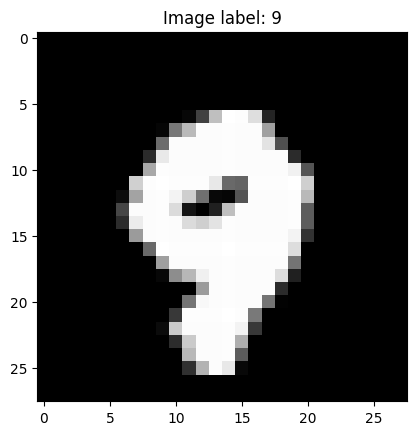

In [18]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Список оптимизаторов для экспериментов
optimizers = {
    "SGD": lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9),
    "Adam": lambda params: torch.optim.Adam(params, lr=0.001),
    "RMSprop": lambda params: torch.optim.RMSprop(params, lr=0.001)
}

# Функция потерь
criterion = nn.CrossEntropyLoss()

# Экспериментируем с каждым оптимизатором
results = {}
num_epochs = 5

for opt_name, opt_fn in optimizers.items():
    print(f"\n=== Training with {opt_name} ===")

    # Создаём новую модель для каждого оптимизатора
    model = CLS().to(device)
    optimizer = opt_fn(model.parameters())

    # Обучаем модель
    train_model(model, train_data_loader, criterion, optimizer, num_epochs)

    # Оцениваем модель
    accuracy = evaluate_model(model, test_data_loader)
    results[opt_name] = accuracy
    print(f"Accuracy with {opt_name}: {accuracy:.2f}%")

# Выводим результаты
print("\n=== Summary ===")
for opt_name, accuracy in results.items():
    print(f"{opt_name}: {accuracy:.2f}%")
    if accuracy >= 92:
        print(f"Target accuracy of 92% achieved with {opt_name}!")
    else:
        print(f"Target accuracy of 92% not achieved with {opt_name}.")

# Визуализация случайного изображения (как в вашем коде)
random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28), cmap='gray')  # Добавляем cmap='gray' для корректного отображения
plt.title(f'Image label: {_label}')
plt.show()

Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [19]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [20]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.99252


In [21]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [22]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9795


Проверка, что пороги пройдены:

In [23]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [25]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

File saved to `submission_dict_mnist_task_1.json`


### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!